# HEALTHCARE MONITORING ANALYSIS

# Problem That we're facing
Traditional health monitoring systems often categorize patient health status using rigid, predefined thresholds that may not capture the nuanced variations across a diverse patient population. This can lead to oversimplified assessments and potentially overlook subtle yet critical patterns in health data. 

The challenge is to develop a more dynamic and responsive approach that utilizes unsupervised learning to identify natural groupings within health data, facilitating personalized and precise health management."""

# Expected Outcomes
**Identified Clusters:** Distinct patient groups based on health metrics, each with unique characteristics that provide insight into their specific health needs.

**Personalized Health Insights:** Enhanced understanding of patient health requirements and risks, enabling tailored intervention strategies.

**Improved Health Monitoring:** Recommendations for targeted monitoring and intervention strategies that cater to the specific needs of each cluster, leading to more effective health management and better patient outcomes.

# Dataset
The dataset includes health metrics from 500 individuals, featuring variables such as age, gender, heart rate, blood pressure, respiratory rate, 
body temperature, and oxygen saturation, recorded over a specific period.

# Flow of Analyzing the Problem
For the task of Health Monitoring and Analysis, we will aim to monitor the health of the patients in the data, analyze the patterns 
found in different types of patients and group them based on their health standards.

**Importing the necessary Python Libraries & the dataset**

In [9]:
import pandas as pd
health_data = pd.read_csv('healthmonitoring.csv')
print(health_data.head())

   PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0          1   69    Male  60.993428        130/85               15   
1          2   32    Male  98.723471        120/80               23   
2          3   78  Female  82.295377        130/85               13   
3          4   38  Female  80.000000        111/78               19   
4          5   41    Male  87.531693        120/80               14   

   BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0        98.885236       resting              95.0    excellent         low   
1        98.281883       walking              97.0         good        high   
2        98.820286       resting              98.0         fair        high   
3        98.412594       running              98.0         poor    moderate   
4        99.369871       resting              98.0         good         low   

                    Timestamp  
0  2024-04-26 17:28:55.286711  
1  2024-04-26 17:23:55.286722  
2 

In [10]:
# whether the data contains any null values or not
health_data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

In [11]:
# Calculate Medians
median_body_temp = health_data['BodyTemperature'].median()
median_oxygen_sat = health_data['OxygenSaturation'].median()

In [12]:
# fill Missing values
health_data['BodyTemperature'].fillna(median_body_temp, inplace=True)
health_data['OxygenSaturation'].fillna(median_oxygen_sat, inplace=True)

In [13]:
health_data.isnull().sum()

PatientID           0
Age                 0
Gender              0
HeartRate           0
BloodPressure       0
RespiratoryRate     0
BodyTemperature     0
ActivityLevel       0
OxygenSaturation    0
SleepQuality        0
StressLevel         0
Timestamp           0
dtype: int64

In [14]:
# Next, I will examine summary statistics and the distribution of the numerical health metrics.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

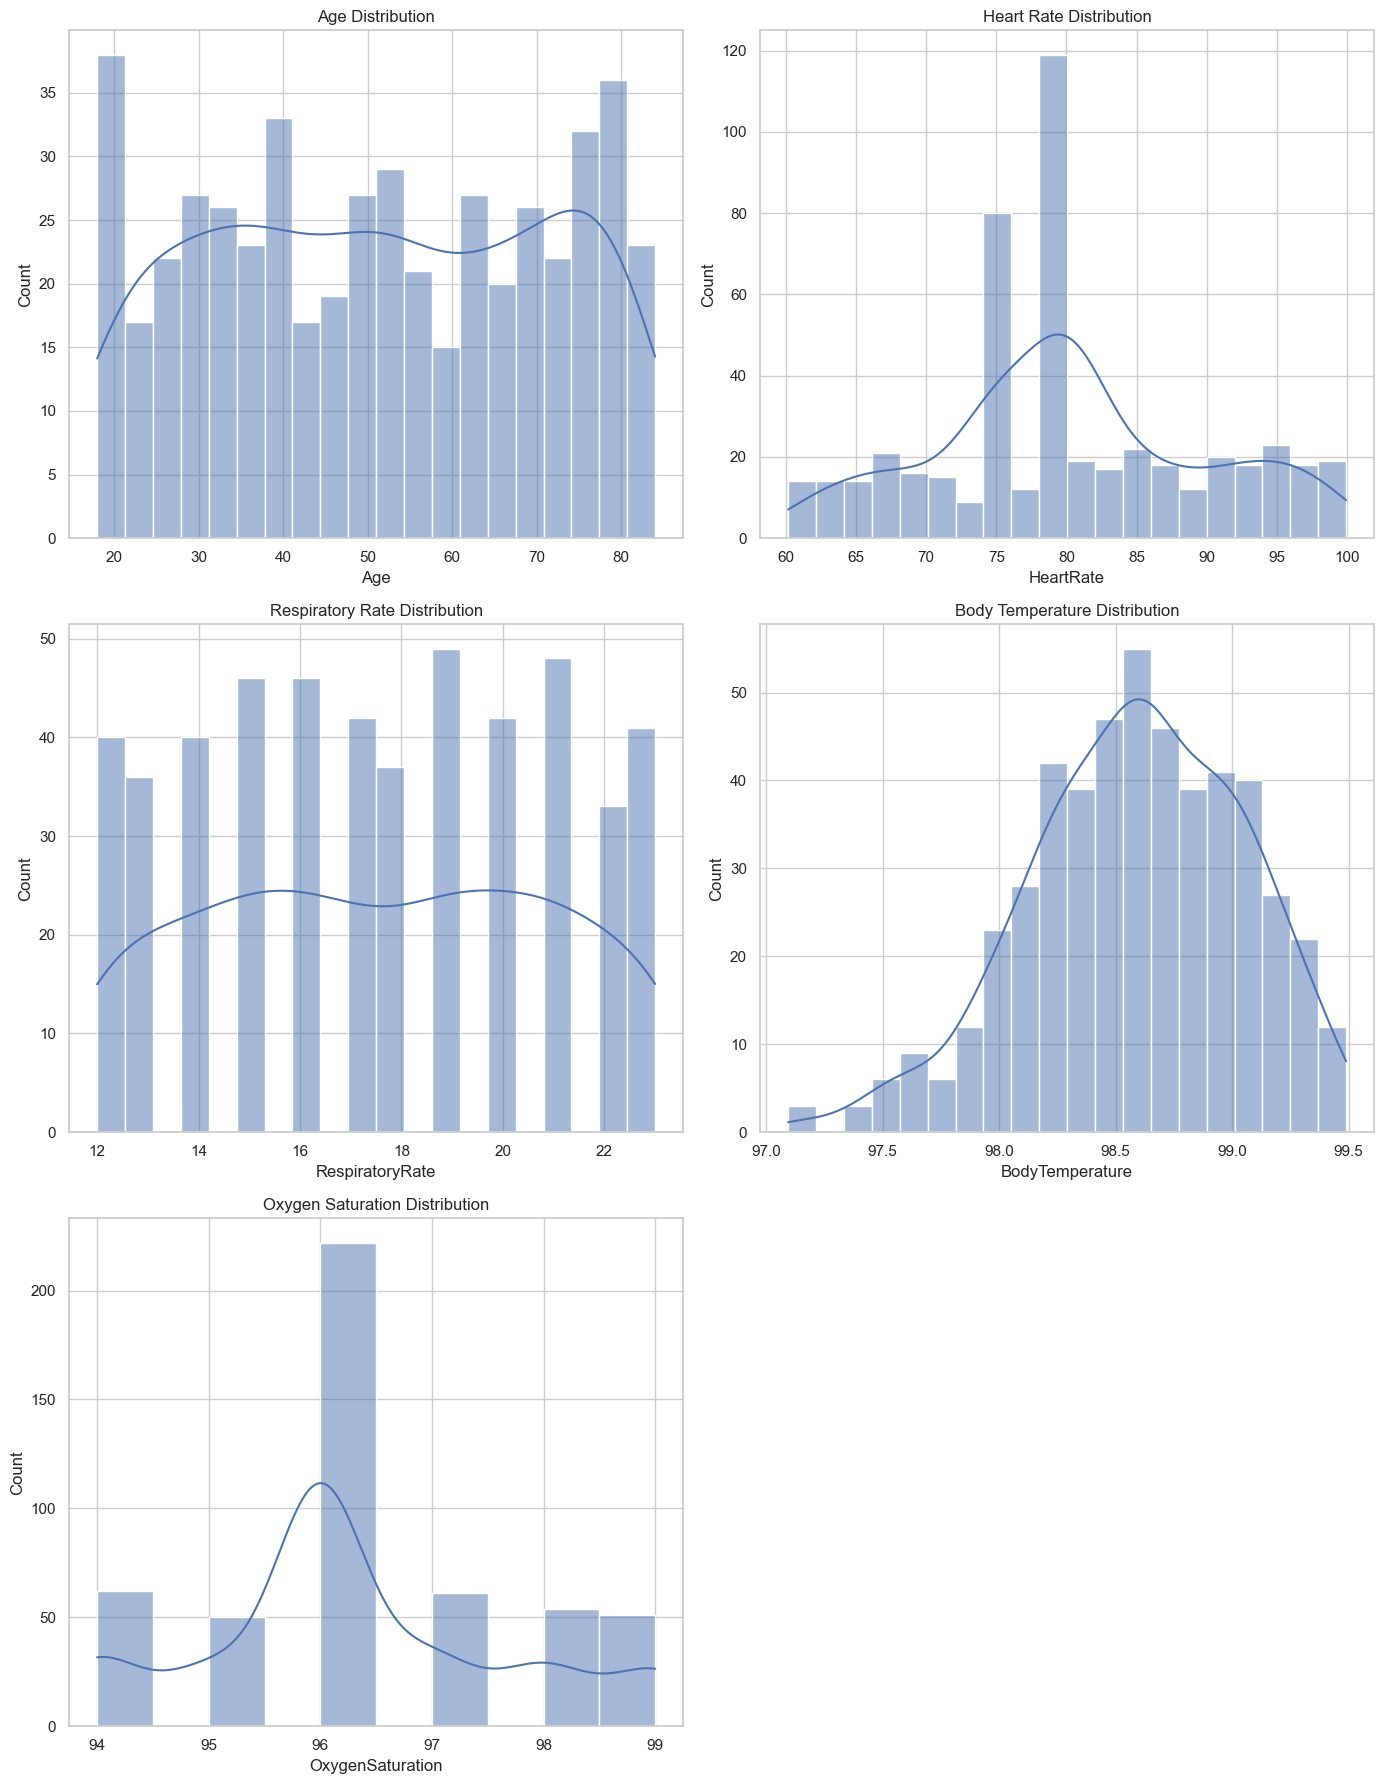

In [25]:
# Statistics Summary
summary_stats = health_data.describe()

# Plotting Distributions of Numerical Features
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
sns.histplot(health_data['Age'], bins=20, kde=True, ax=axes[0,0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(health_data['HeartRate'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate Distribution')

sns.histplot(health_data['RespiratoryRate'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Respiratory Rate Distribution')

sns.histplot(health_data['BodyTemperature'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Body Temperature Distribution')

sns.histplot(health_data['OxygenSaturation'], bins=10, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Oxygen Saturation Distribution')

fig.delaxes(axes[2, 1]) #Remove Unuse fig

plt.tight_layout()
plt.show()

In [26]:
print(summary_stats)

        PatientID         Age   HeartRate  RespiratoryRate  BodyTemperature  \
count  500.000000  500.000000  500.000000       500.000000       500.000000   
mean   250.500000   51.146000   80.131613        17.524000        98.584383   
std    144.481833   19.821566    9.606273         3.382352         0.461502   
min      1.000000   18.000000   60.169259        12.000000        97.094895   
25%    125.750000   34.000000   75.000000        15.000000        98.281793   
50%    250.500000   51.000000   80.000000        17.500000        98.609167   
75%    375.250000   69.000000   86.276413        20.000000        98.930497   
max    500.000000   84.000000   99.925508        23.000000        99.489150   

       OxygenSaturation  
count        500.000000  
mean          96.296000  
std            1.408671  
min           94.000000  
25%           96.000000  
50%           96.000000  
75%           97.000000  
max           99.000000  


In [ ]:
# look at the gender distribution in the data and the correlation between the numerical columns in the dataset

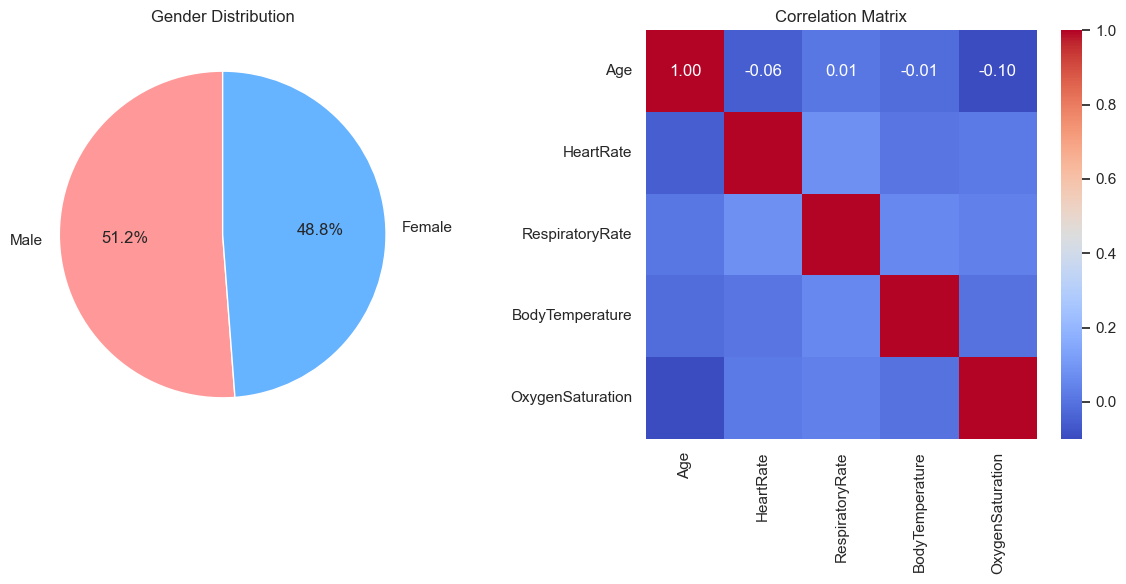

In [47]:
# Gender Distribution
gender_counts = health_data['Gender'].value_counts()

# Correlation Matrix for Numerical health metrics
correlation_matrix = health_data[['Age','HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation']].corr()

# Plotting the findings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gender Distribution Plot
gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle = 90, colors =['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# Correlation Matrix Plot
sns.heatmap(correlation_matrix, annot= True, fmt='.2f', cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

**The pie chart indicates a nearly even split between male and female subjects in the dataset, with males comprising a slight majority at 51.2%.**

**The correlation matrix shows no strong correlations between the variables, as all the values are close to zero.**
**Specifically, none of the health metrics display a strong positive or negative linear relationship with one another in this particular dataset.**

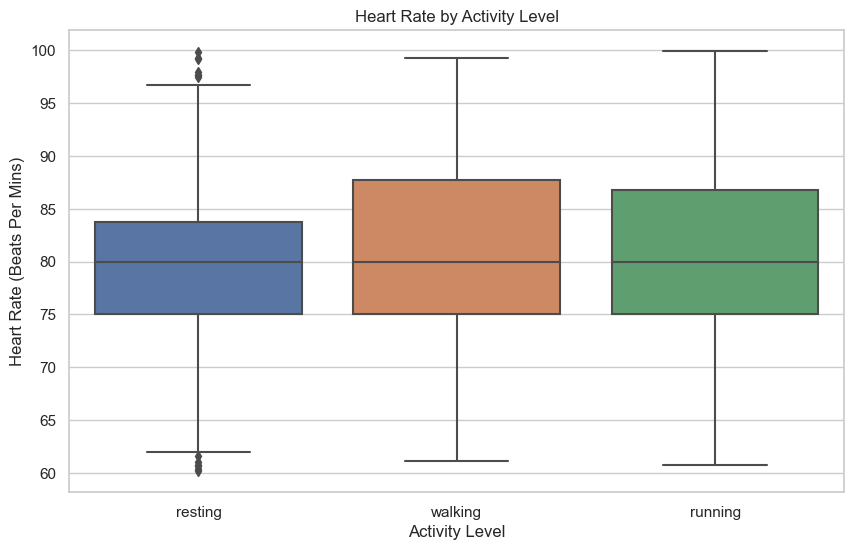

In [48]:
# Heart Rate by Activity Level
plt.figure(figsize = (10, 6))
sns.boxplot(x='ActivityLevel', y='HeartRate', data=health_data)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate (Beats Per Mins)')
plt.xlabel('Activity Level')
plt.show()

**It shows that the median heart rate increases from resting to walking, which is expected as physical activity increases.**

**However, the median heart rate does not significantly increase further during running compared to walking, which is unusual since we would expect a higher median heart rate for a more strenuous activity.**

**The presence of outliers in the resting category indicates that some individuals have resting heart rates that are much higher than the typical range for the rest of the group.**

In [ ]:
# Look at the distribution of blood pressure levels and some health metrics by gender

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


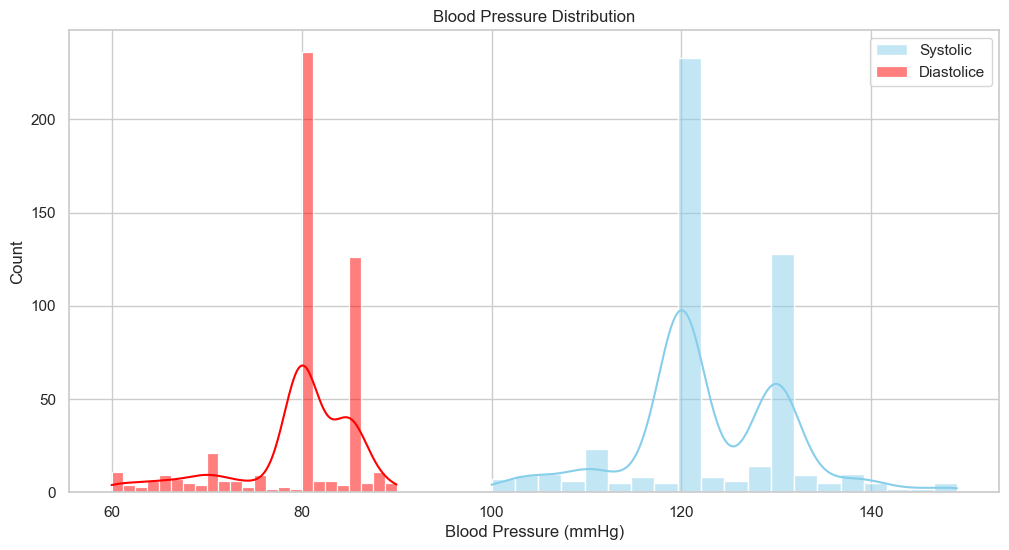

In [56]:
# Extracting Systolic and Distolic Blood Pressure
health_data[['SystolicBP', 'DiastolicBP']] = health_data['BloodPressure'].str.split('/', expand=True).astype(int)

# Blood Pressure Distribution
plt.figure(figsize = (12, 6))
sns.histplot(health_data['SystolicBP'], color='skyblue', label='Systolic', kde=True)
sns.histplot(health_data['DiastolicBP'], color='red', label='Diastolice', kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.legend()
# plt.tight_layout()
plt.show()

**The systolic blood pressure, represented in blue, shows a more spread-out distribution with peaks suggesting common readings around 120 mmHg and 140 mmHg.** 
**The diastolic blood pressure, in red, appears to have a narrower distribution, with a significant peak around 80 mmHg.**

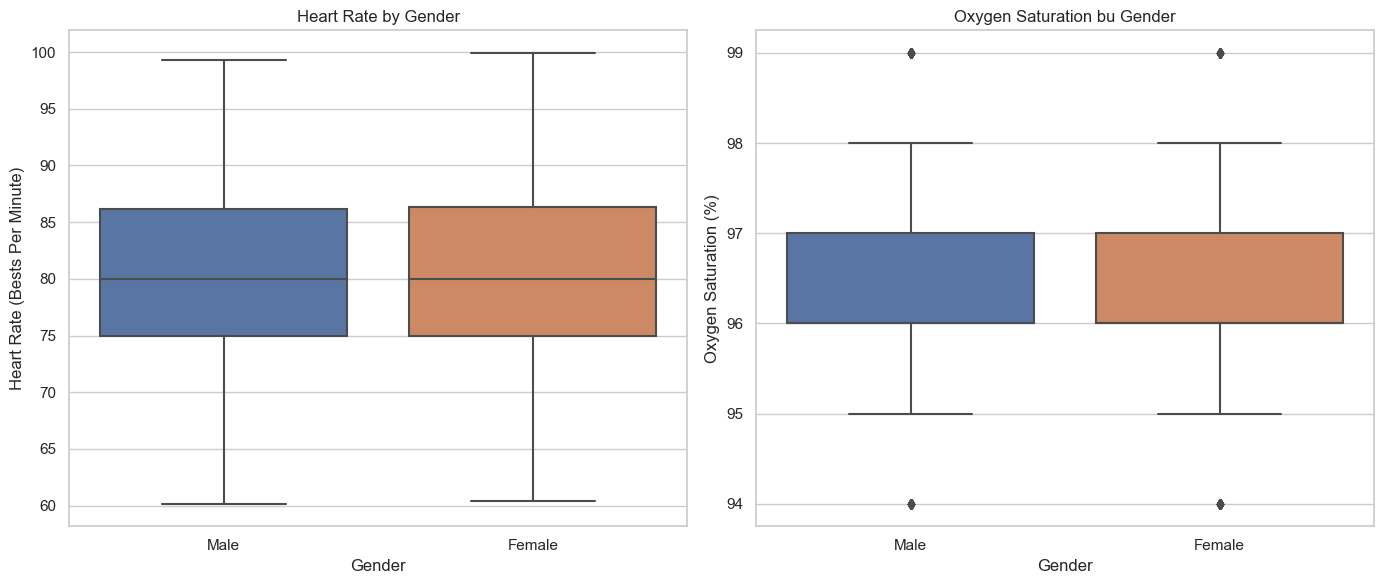

In [61]:
# Health Metrics By Gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Gender', y='HeartRate', data=health_data, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (Bests Per Minute)')

sns.boxplot(x='Gender', y='OxygenSaturation', data=health_data, ax=axes[1])
axes[1].set_title('Oxygen Saturation bu Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

**For heart rate, both males and females show similar median values with a relatively similar interquartile range, indicating no significant difference in heart rate between genders within this dataset.**

**In terms of oxygen saturation, again, both genders exhibit nearly identical medians and interquartile ranges, suggesting that oxygen saturation does not differ notably between males and females in this sample. There are a few outliers in oxygen saturation for both genders, indicating a few individuals with lower than typical values, but these do not seem to affect the overall distribution significantly.**

In [63]:
# let’s analyze heart rate and oxygen saturation by sleep quality and stress levels

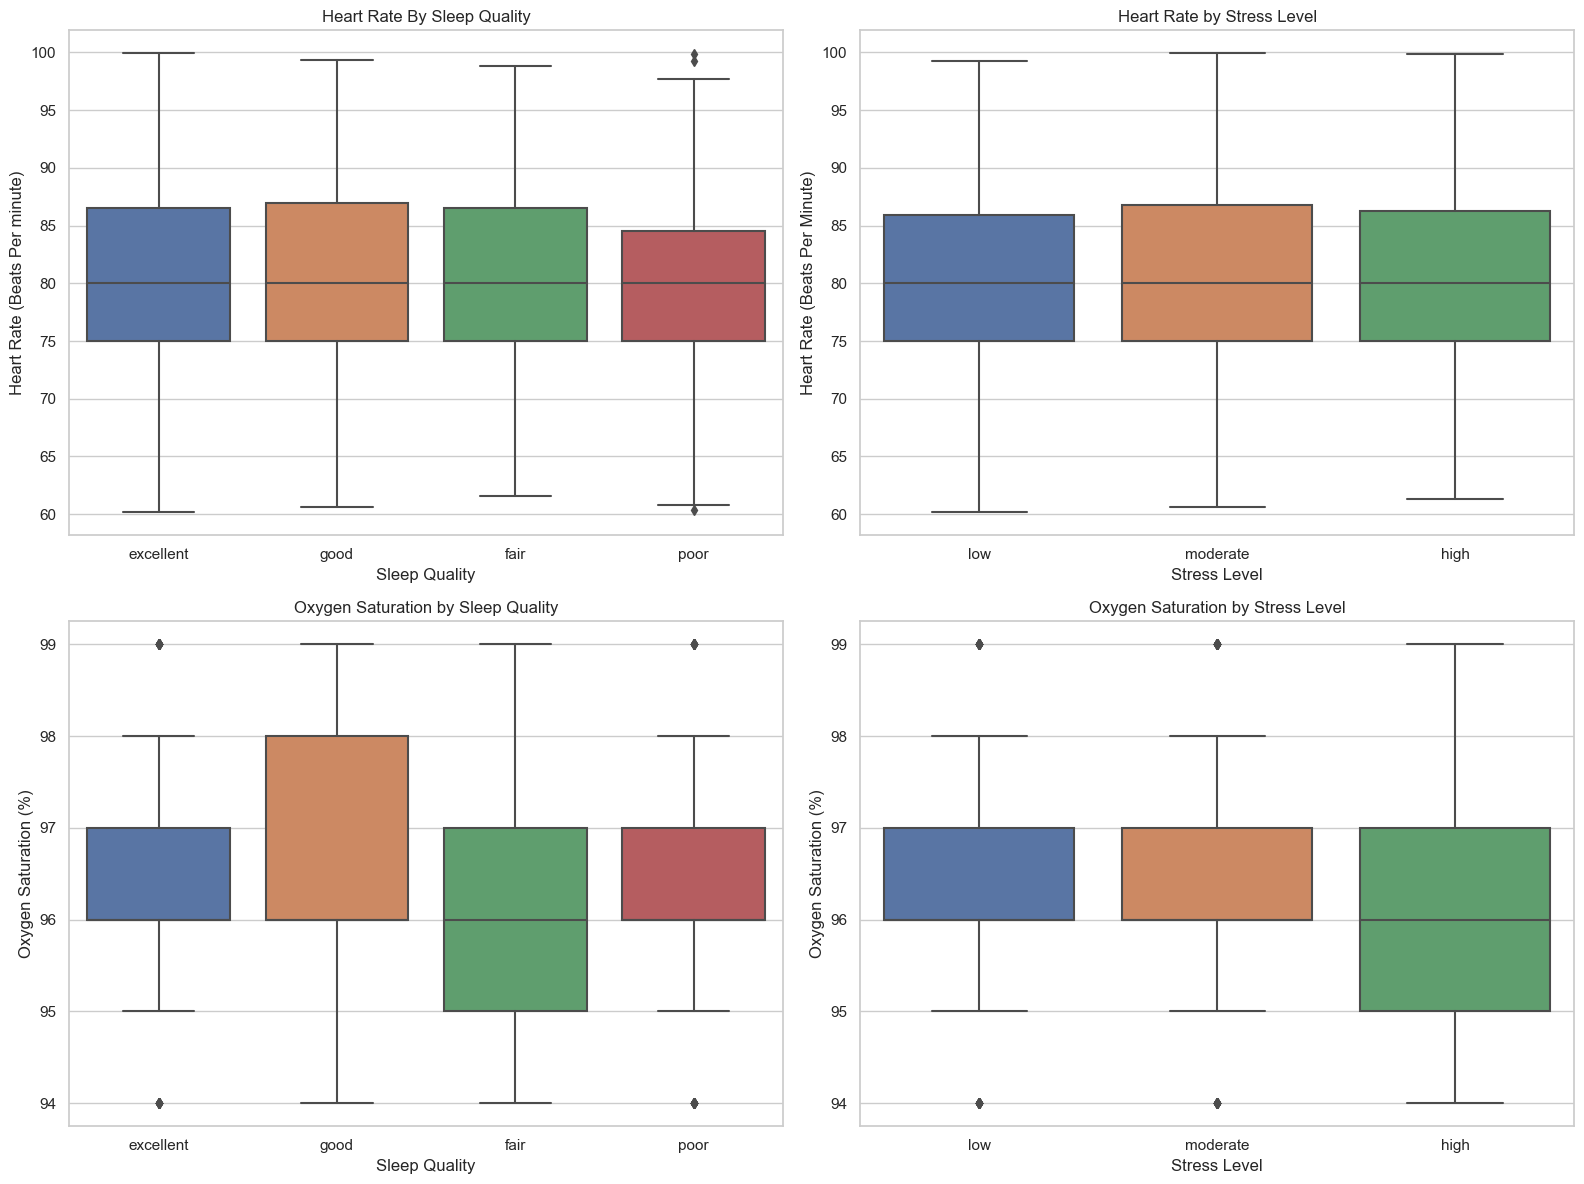

In [68]:
# Categorizing sleep quality and stress level for better analysis
sleep_quality_order = ['excellent', 'good', 'fair', 'poor']
stress_level_order = ['low','moderate','high']

# Creating Plots to Examine Relationships
fig, axes = plt.subplots(2, 2, figsize = (16, 12))

# Heart Rate by Sleep Quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=health_data, order=sleep_quality_order, ax=axes[0,0])
axes[0,0].set_title('Heart Rate By Sleep Quality')
axes[0,0].set_xlabel('Sleep Quality')
axes[0,0].set_ylabel('Heart Rate (Beats Per minute)')


# Heart Rate by Stress Level
sns.boxplot(x='StressLevel', y='HeartRate', data=health_data, order=stress_level_order, ax=axes[0,1])
axes[0,1].set_title('Heart Rate by Stress Level')
axes[0,1].set_xlabel('Stress Level')
axes[0,1].set_ylabel('Heart Rate (Beats Per Minute)')

# oxygen saturation by sleep quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=health_data, order=sleep_quality_order, ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Oxygen Saturation (%)')

# oxygen saturation by stress level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=health_data, order=stress_level_order, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation by Stress Level')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()


**Heart rate appears relatively consistent across different levels of sleep quality and stress, with a slight increase in variation for those reporting poor sleep.**

**Oxygen saturation shows a minimal decrease in median values from excellent to poor sleep quality, with some outliers indicating lower saturation for excellent and good sleep.**

In [ ]:
# Let’s analyze the respiratory rate and body temperature by activity levels

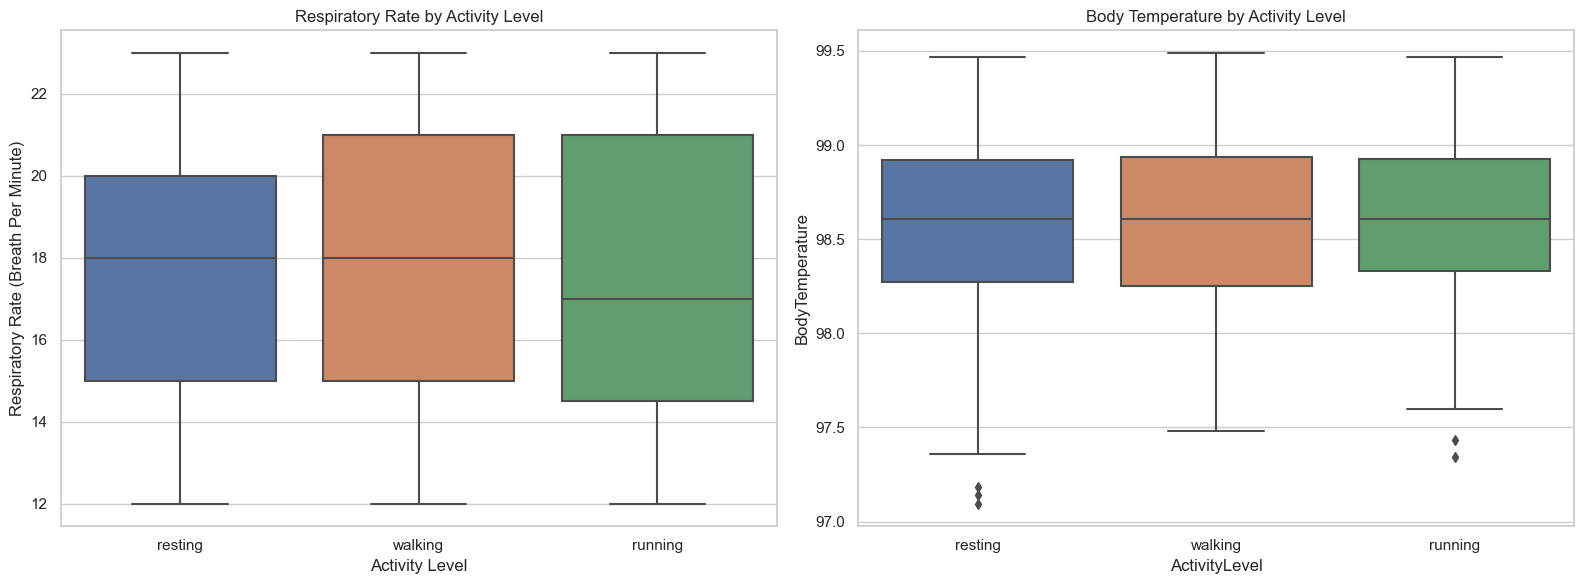

In [74]:
# Creating plots to examine relationships  b/w Activity Levels & other
fig, axes=plt.subplots(1, 2, figsize=(16, 6))

# Respiratory Rate by Activity Level
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data=health_data, ax=axes[0])
axes[0].set_title('Respiratory Rate by Activity Level')
axes[0].set_xlabel('Activity Level')
axes[0].set_ylabel('Respiratory Rate (Breath Per Minute)')

# Body Temperature by Activity Level
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data=health_data, ax=axes[1])
axes[1].set_title('Body Temperature by Activity Level')
axes[1].set_xlabel('ActivityLevel')
axes[1].set_ylabel('BodyTemperature')

plt.tight_layout()
plt.show()

**The respiratory rate tends to increase with activity level, as indicated by higher median rates for walking and running compared to resting.**

**For body temperature, there is a slight upward trend from resting to running, which is consistent with the body heating up during physical exertion. There are outliers in body temperature at the resting and running levels, suggesting some individuals have temperatures outside the typical range for these activities.**

In [76]:
# Grouping Patients

**Grouping Patients**

The data is not so complicated enough that we need to use a clustering algorithm to group patients. So, let’s group patients based on:

**1. Age Group:** Young, Middle-aged, Senior

**2. Blood Pressure Category:** Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2

**3. Heart Rate Category:** Low, Normal, High

**4. Oxygen Saturation Category:** Normal, Low

In [82]:
# Function to Categorize Age
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'
        

# Function to Categorize Blood Pressure
def bp_category(systolic, diastolic):
    if systolic < 120 and  diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# Function to Categorize Heart Rate 
def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

# Function to Categorize Oxygen Saturation
def oxy_category(oxy):
    if oxy < 94:
        return 'Low'
    else:
        return 'Normal'


# Apply Categorizations
health_data['AgeGroup'] = health_data['Age'].apply(age_group)
health_data['BPCategory'] = health_data.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis =1)
health_data['HRCategory'] = health_data['HeartRate'].apply(hr_category)
health_data['OxyCategory'] = health_data['OxygenSaturation'].apply(oxy_category)

print(health_data[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate','HRCategory','OxygenSaturation','OxyCategory']].head())

   Age     AgeGroup  SystolicBP  DiastolicBP BPCategory  HeartRate HRCategory  \
0   69       Senior         130           85   Elevated  60.993428     Normal   
1   32        Young         120           80   Elevated  98.723471     Normal   
2   78       Senior         130           85   Elevated  82.295377     Normal   
3   38  Middle-aged         111           78     Normal  80.000000     Normal   
4   41  Middle-aged         120           80   Elevated  87.531693     Normal   

   OxygenSaturation OxyCategory  
0              95.0      Normal  
1              97.0      Normal  
2              98.0      Normal  
3              98.0      Normal  
4              98.0      Normal  


In [83]:
# Visualize The Group Data

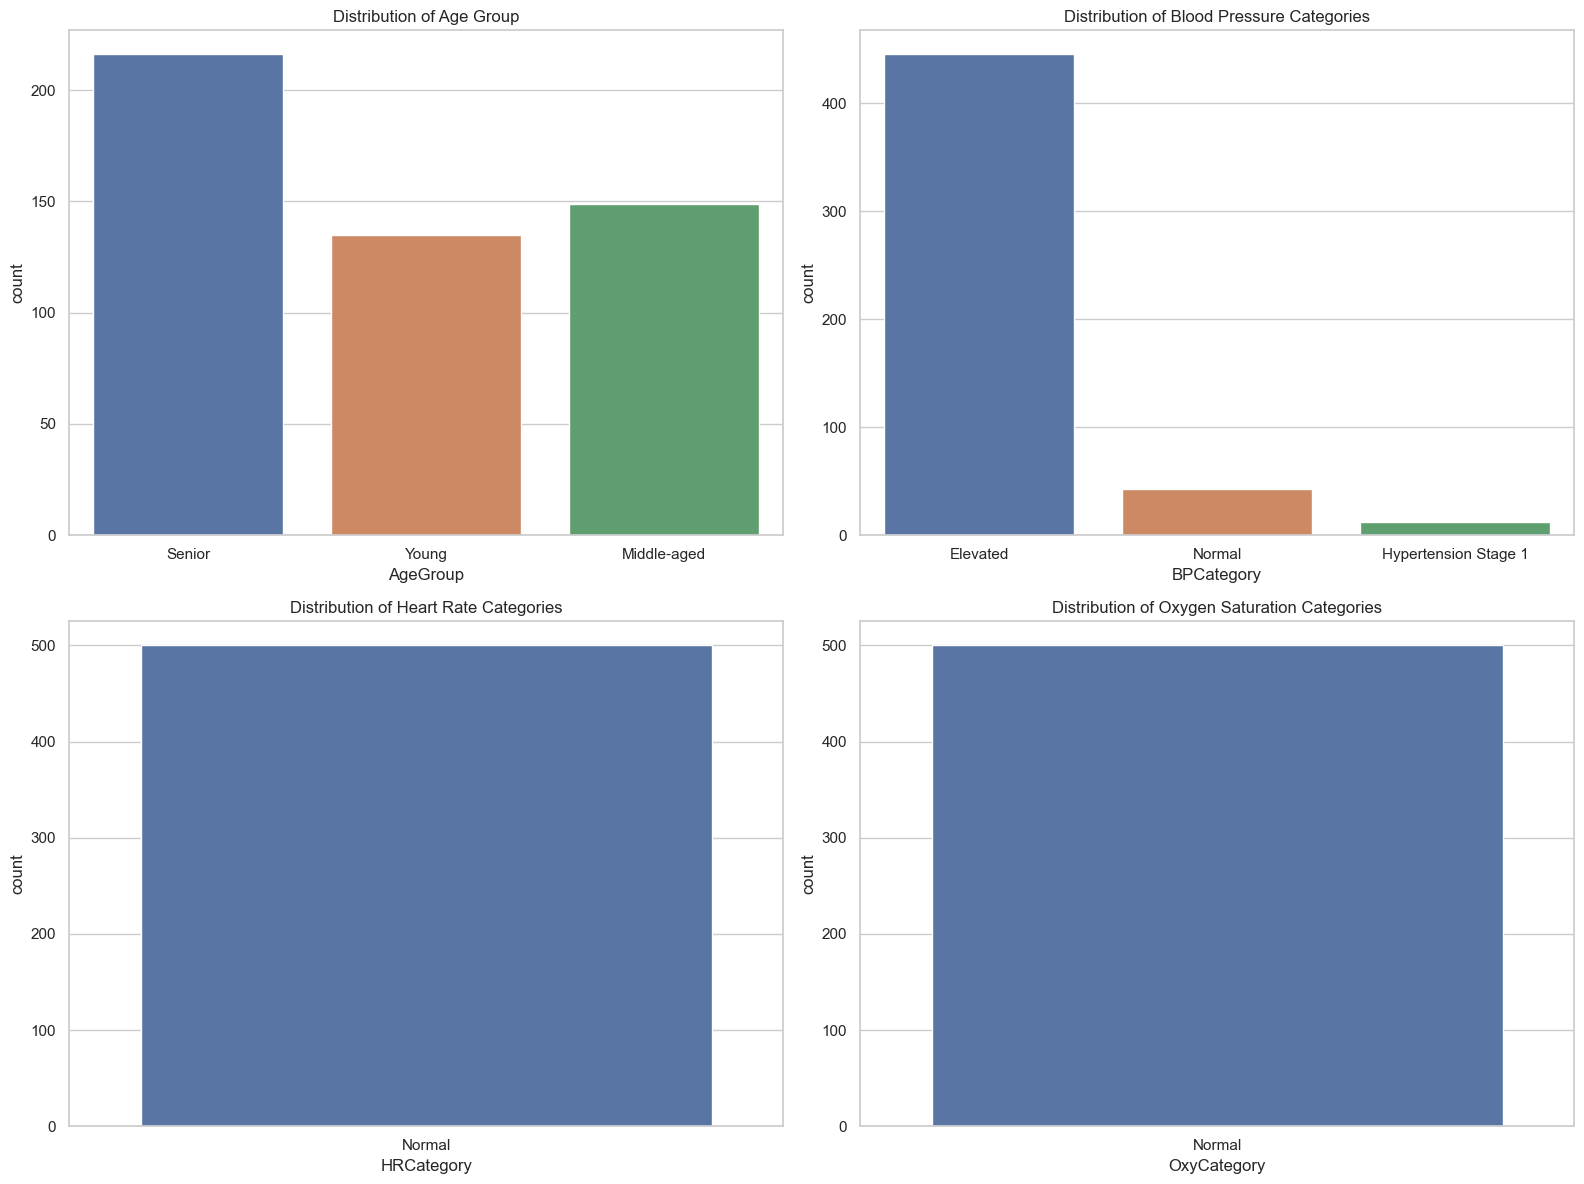

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Group Count Plot
sns.countplot(x='AgeGroup', data=health_data, ax=axes[0,0])
axes[0,0].set_title('Distribution of Age Group')

# Blood Pressure Cound Plot
sns.countplot(x='BPCategory', data=health_data, ax=axes[0,1])
axes[0,1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate Category count plot
sns.countplot(x='HRCategory', data=health_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation Category count plot
sns.countplot(x='OxyCategory', data=health_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Oxygen Saturation Categories')


plt.tight_layout()
plt.show()

**Distribution of Age Groups:** The count plot shows that the ‘Senior’ category has the highest count, followed by the ‘Young’ and ‘Middle-aged’ categories. It suggests that seniors are the largest age group in this dataset.

**Distribution of Blood Pressure Categories:** The majority of the dataset falls under ‘Normal’ blood pressure, with fewer instances in the ‘Elevated’ and ‘Hypertension Stage 1’. ‘Hypertension Stage 2’ has the lowest count, indicating that severe hypertension is less common among the participants.

**Distribution of Heart Rate Categories:** Most individuals have a ‘Normal’ heart rate, with very few falling into the ‘Low’ or ‘High’ categories. It indicates that most individuals in this dataset have a heart rate that falls within the expected range.

**Distribution of Oxygen Saturation Categories:** Almost everyone has ‘Normal’ oxygen saturation levels, with very few instances of ‘Low’ saturation. It suggests that oxygen deprivation is not a common issue in this group.